# Tarea 7: Ecuaciones diferenciales ordinarias



**Ocampo García Víctor Emmanuel Miguel Ángel**


[12] Revisa aquí: https://modelo.covid19.cdmx.gob.mx/modelo-epidemico el modelo epidemeológico de la CDMX. Escribe las ecuaciones, con los parámetros que ahí dan y resuelve el modelo con algún solucionador "bueno". 

**Nota:** ¿La simulación se acerca algo a lo que sucedió en la ciudad? ¿Al menos se acerca a los primeros meses? ¿Cómo se podría mejorar este modelo? ¿cual es el error de fondo de estos modelos epidemeológicos?

In [1]:
using LaTeXStrings

El sistema de ecuaciones es 

$$ \frac{dS}{dt}=-\bigg(\frac{R_{0}}{D_{infect}}\bigg)IS$$

$$\frac{dE}{dt}=\bigg(\frac{R_{0}}{D_{infect}}\bigg)IS-\bigg(\frac{1}{D_{incub}}\bigg)E$$

$$\frac{dI}{dt}=\bigg(\frac{1}{D_{incub}}\bigg)E-\bigg(\frac{1}{D_{infect}}\bigg)I$$

$$\frac{dL}{dt}=(1-p_{grave})\bigg(\frac{1}{D_{infect}}\bigg)I-\bigg(\frac{1}{D_{RL}}\bigg)L$$

$$\frac{dG}{dt}=p_{grave}\bigg(\frac{1}{D_{infect}}\bigg)I-\bigg(\frac{1}{D_{hosp}}\bigg)G$$

$$\frac{dH}{dt}=\bigg(\frac{1}{D_{hosp}}\bigg)G-(1-p_{ICU})\bigg(\frac{1}{D_{RH}}\bigg)H-p_{ICU}\bigg(\frac{1}{D_{ICU}}\bigg)H$$

$$\frac{dICU}{dt}=p_{ICU}\bigg(\frac{1}{D_{ICU}}\bigg)H-(1-p_{M})\bigg(\frac{1}{D_{RICU}}\bigg)ICU-p_{M}\bigg(\frac{1}{D_{M}}\bigg)ICU$$

$$\frac{dR}{dt}=\bigg(\frac{1}{D_{RL}}\bigg)L+(1-p_{ICU})\bigg(\frac{1}{D_{RH}}\bigg)H+(1-p_{M})\bigg(\frac{1}{D_{RICU}}\bigg)ICU$$

$$\frac{dM}{dt}=p_{M}\bigg(\frac{1}{D_{M}}\bigg)ICU$$

$$S+E+I+L+G+H+ICU+R+M=1$$

y los parámetros son:

$$D_{infect}=2.9, D_{incub}=5.2, p_{grave}=13.80\%, D_{RL}=14, D_{hosp}=4, p_{ICU}=5\%, D_{RH}=12, p_{M}=3\%, D_{ICU}=1, D_{RICU}=7, D_{M}=8, R_{0}=2.83$$

donde

$S =$ Susceptibles

$E =$ Expuestos

$I =$ Infectados

$L =$ Contagios sintomáticos leves

$G =$ Contagios sintomáticos graves

$H =$ Hospitalizados

$ICU =$ Unidad de terapia intensiva

$R =$ Recuperados

$M =$ Muertos

In [2]:
function solucionador_euler(g, x_0, t, h = 0.01) 
    n = floor(Int, t/h)+1
    X = [zero(x_0) for i in 1:n]
    X[1] = x_0
    for i in 2:n
        X[i] = X[i-1]+h*g(X[i-1], h*(i-1))
    end
    return X
end

solucionador_euler (generic function with 2 methods)

In [3]:
d_infect, d_incub, p_grave, d_rl, d_hosp, p_icu, d_rh, p_m, d_icu, d_ricu, d_m, r_0, δ = 2.9, 5.2, 0.138, 14, 4, 0.05, 12, 0.03, 1, 7, 8, 2.83, 0.01 #definimos los parámetros
g_e12(x, t) = [-(r_0/d_infect)*x[3]*x[1], (r_0/d_infect)*x[3]*x[1]-(1/d_incub)*x[2], (1/d_incub)*x[2]-(1/d_infect)*x[3], (1-p_grave)*(1/d_infect)*x[3]-(1/d_rl)*x[4], p_grave*(1/d_infect)*x[3]-(1/d_hosp)*x[5], (1/d_hosp)*x[5]-(1-p_icu)*(1/d_rh)*x[6]-p_icu*(1/d_icu)*x[6], p_icu*(1/d_icu)*x[6]-(1-p_m)*(1/d_ricu)*x[7]-p_m*(1/d_m)*x[7], (1/d_rl)*x[4]+(1-p_icu)*(1/d_rh)*x[6]+(1-p_m)*(1/d_ricu)*x[7], p_m*(1/d_m)*x[7]] #definimos las 9 ec. dif. ord.
x_0_e12 = [1.0 - δ, 0.0, δ, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] #las C.I.
X_e12 = solucionador_euler(g_e12, x_0_e12, 100, 0.01); #aplicamos para un tiempo de 100 días (primeros 3 meses) con h=0.01

In [4]:
using Plots, LaTeXStrings

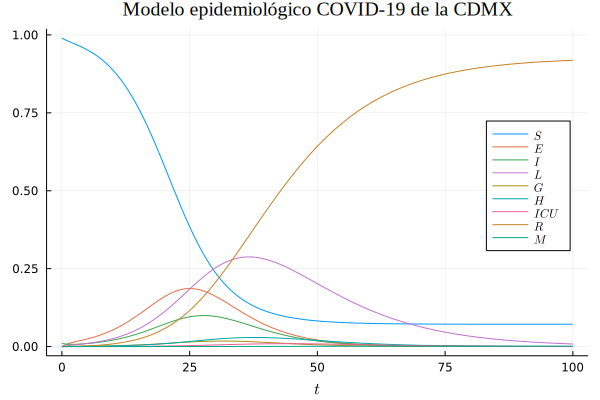

In [5]:
T_e12 = 0.0:0.01:100
#plotly()
gr()
plot(T_e12, [X_e12[i][1] for i in 1:length(X_e12)], label = L"S", key = :right, xlabel = L"t", title = "Modelo epidemiológico COVID-19 de la CDMX", titlefont = (12, "times"))
etiquetas = [L"E", L"I", L"L", L"G", L"H", L"ICU", L"R", L"M"]
for j in 1:8
    plot!(T_e12, [X_e12[i][j+1] for i in 1:length(X_e12)], label = "$(etiquetas[j])")
end
plot!()

La simulación se acerca a lo que sucedido con el COVID-19 en la CDMX ya que el modelo SEIR se adapta al comportamiento de la epidemia dado que toma en consideración a los expuestos: individuos que portan la enfermedad, pero que al hallarse en período de incubación, no muestran síntomas y aún no pueden infectar a otros. 

Esto resulta para los primeros 3 meses aproximadamente. Aumenta rápidamente el número de expuestos y con ello aumenta sustancialmente la cantidad de infectados y contagios leves ocasionando una disminución significativa en la cantidad de susceptibles. Posteriormente se eleva la cantidad de muertos, hospitalizados y aquellos internados en la unidad de terapia intensiva. Finalmente disminuye la cantidad de contagios, aumenta la cantidad de recuperados.

Para mejorar el modelo se me ocurre aplicar lo del profesor en el vídeo: poner dinámica a la población, es decir, pensar en alguna distribución espacial de la población. Otra opción es cambiar el parámetro $\beta = \bigg(\frac{R_{0}}{D_{infect}}\bigg)$, llamado tasa de transmisión, ya que este parámetro se puede ajustar artificialmente si se adoptan medidas de contención (protección y aislamiento), y si la población las adopta y las cumple. Así, algunas de las propuestas son:

$$\beta(t)=\beta_{0}\big((c_{0}-c_{b})e^{-r_{1}t}+c_{b}\big)$$

donde $\beta_{0}$ es la tasa de infección sin medidas de contención, $c_{0}$ y $c_{b}$ aluden a las tasas de contacto.

Otra opción es

$$\beta(t)=\beta_{0}(1-\alpha(t))\bigg(1-\frac{D(t)}{N}\bigg)^k$$

donde $\beta_{0}$ es la tasa de infección sin medidas, $\alpha(t)$ es el resultado de las acciones gubernamentales, $D(t)$ es la sensación pública de riesgo como consecuencia de los casos críticos y muertes de conocidos y $k$ mide la intensidad de reacción de los individuos. También cabe señalar que $N$ es el parámetro de población suceptible (22 millones para la CDMX).

De los errores de este modelo destacamos que estas ecuaciones son válidas para una región local, ya que maneja una probabilidad de contagio constante entre cualesquiera dos individuos de la CDMX. Otra cuestión es que para tiempos más largos (dados los parámetros señalados) el modelo ya no describe un comportamiento referente a lo ocurrido. También parámetros como la tasa de transmisión son complicados de estimar, porque no se sabe cuántas personas infectadas asintomáticas hay que puedan estar infectando a otros.[1]

Referencias:
[1] Gutiérrez, J., & Varona, J. (2020). Análisis del Covid-19 por medio de un modelo SEIR. abril 29, 2021, de Blog del Instituto de Matemáticas de la Universidad de Sevilla. Sitio web: https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/